# BigQuery SQL

```
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information`
WHERE MOD(CUST_ID,2) = 0
```

# Problems

Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir. 

# Conceptual Problems

1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?

Inertia, a `sklearn.cluster.KMeans` attribute, is sum of squared distances of samples to their closest cluster center. The formula looks like this `np.sum( ( Euclidean distance point 1 )**2 + ... + ( Euclidean distance point N )**2 )`, euclidean distance is `np.sqrt( x**2 + y**2 )`.

In other words, the farther a point is to the center, the higher the inertia is. If we visualize it with a scatter plot, we will see the points to be scattered instead of clusterin near the centroid. Therefore, we can say, the higher the interia, the more variations there are.

Therefore, we can use Inertia to determine the best clustering (`sklearn.cluster.KMeans` n_clusters parameter). One way to do this is by visualizing it into line plot (x = number of custers, y = inertia). Simply find the elbow within the plot to find the optimal number of clusters.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow method relies on the inertia score. Inertia score explains the total variations within a cluster. In other words, the farther a point to its centroid, the higher the variations is. If do a line plot with the inertia score, we will see an elbow. The elbow tells us that the reduction in variations after the elbow is insignificant.

The reason we use Elbow method: We use Elbow method because we want to reduce the variations within each cluster.

How to use Elbow method: We can use Elbow method by plotting the `sklearn.cluster.KMeans` inertia_ attribute as the y-axis and the number of clusters as the x-axis.

The weakness of Elbow method: It does not take into account whether a point has been assigned to the wrong cluster. In other words, inertia score incudes `np.sum ( Eucledian distance point outlier )**2 `. Therefore, we may deem that the inertia score after the elbow to be insignificant when in fact, there are still points that have been assigned to the wrong cluster (because the decision boundary overlaps with another cluster)

The strength: It is easy to interpret if we compared it to the silhouette score visualization. Just one graph and we are good to go. If we use silhouette score, we need to visualize the silhouette score against number of clusters. Then, we need to visualize the silhouette score against the coefficient. Then, we need to compare it between each plot (which is the plot that do not have minus silhouette coefficient (we calculate the silhouette coefficient for each point! Therefore we can know whether a point hve minus silhouette coefficient or not), which is the plot that have cluster roughly the same density, which is the plot that all cluster silhouette coefficient pass the silhouette score).

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

We are going to use KMeans, DBScan and Spectral Clustering.

KMeans uses the Eucledian Distance to determine whether a point is part of a cluster or not by calculating the distance of a point to every centroid. Then, the point will be assigned to the cluster with the closest distance.

DBScan uses the distance between a point and centroid (we call it as epsilon) and a miinmum samples to determine whether a point is part of a cluster or an outlier.

Spectral Clustering uses the kernel function (e.g RBF) to determine the relationship between a point to a point. Then, the algorithm assign that point to a cluster that have strongest relationship with that point.

Hierarchical Clustering uses similarity to assign cluster. The similarity is determined with `distance_threshold`. By default, we use Eucllidian Distance. If we use `linkage=average`, in 2-axis, to calculate the distance is by `np.sqrt( (x - centroid)**2 + (y - centroid)**2 )`. While in 3-axis, to calculate the distance is by `np.sqrt( (x - centroid)**2 + (y - centroid)**2 + (z - centroid)**2 )`. A point will have distance to every clusters. It will then choose the nearest cluster.

# 1 - Perkenalan

Name : Jason Rich Darmawan Onggo Putra

Dataset Overview: 

Objective:

**Features**

<table style="width: 85%;">
<tr>
  <th>Feature</th>
  <th>Description</th>
</tr>

<tr>
  <td>CUST_ID</td>
  <td>Identification of Credit Card holder</td>
</tr>

<tr>
  <td>BALANCE</td>
  <td>Balance amount left in their account to make purchases</td>
</tr>

<tr>
  <td>BALANCE_FREQUENCY</td>
  <td>How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</td>
</tr>

<tr>
  <td>PURCHASES</td>
  <td>Amount of purchases made from account</td>
</tr>

<tr>
  <td>ONEOFF_PURCHASES</td>
  <td>Maximum purchase amount done in one-go</td>
</tr>

<tr>
  <td>INSTALLMENTS_PURCHASES</td>
  <td>Amount of purchase done in installment</td>
</tr>

<tr>
  <td>CASH_ADVANCE</td>
  <td>Cash in advance given by the user</td>
</tr>

<tr>
  <td>PURCHASES_FREQUENCY</td>
  <td>How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</td>
</tr>

<tr>
  <td>ONEOFF_PURCHASES_FREQUENCY</td>
  <td>How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</td>
</tr>

<tr>
  <td>PURCHASES_INSTALLMENTS_FREQUENCY</td>
  <td>How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)</td>
</tr>

<tr>
  <td>CASH_ADVANCE_FREQUENCY</td>
  <td>How frequently the cash in advance being paid</td>
</tr>

<tr>
  <td>CASH_ADVANCE_TRX</td>
  <td>Number of Transactions made with 'Cash in Advanced'</td>
</tr>

<tr>
  <td>PURCHASES_TRX</td>
  <td>Number of purchase transactions made</td>
</tr>

<tr>
  <td>CREDIT_LIMIT</td>
  <td>Limit of Credit Card for user</td>
</tr>

<tr>
  <td>PAYMENTS</td>
  <td>Amount of Payment done by user</td>
</tr>

<tr>
  <td>MINIMUM_PAYMENTS</td>
  <td>Minimum amount of payments made by user</td>
</tr>

<tr>
  <td>PRC_FULL_PAYMENT</td>
  <td>Percent of full payment paid by user</td>
</tr>

<tr>
  <td>TENURE</td>
  <td>Tenure of credit card service for user</td>
</tr>
</table>

However, according to Bank of America

> [A credit card cash advance is a withdrawal of cash from your credit card account. Essentially, you’re borrowing against your credit card to put cash in your pocket.](https://bettermoneyhabits.bankofamerica.com/en/credit/what-is-a-credit-card-cash-advance)

Therefore, we will assume that 'CASH_ADVANCE' as a service offered by the credit card company. [outline](#relationship-between-features)

# 2 - Import Libraries

In [1]:
# Data Loading
import pandas as pd

# Exploratory Data Analysis
import numpy as np
import seaborn as sns

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

# Model Definition
from sklearn.cluster import KMeans,  DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

# Model Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram

import joblib

# 3 - Data Loading

TODO
- [ ] Drop column 'CUST_ID' because it should not have collinearity with other features.
- Every features in the data set are numerical.

In [2]:
# Load dataset
dt = pd.read_csv("./h8dsft_P1G4_jason_rich_darmawan_onggo_putra.csv")

# Data set preview
with pd.option_context("display.float_format", "{:,.2f}".format):
    display(dt)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.58,0.12,200.00,0.00,200.00,0.00,0.12,0.00,0.12,0.00,0,2,"1,200.00",0.00,NaN,0.00,8
1,1902,943.58,0.88,103.00,103.00,0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,000.00",215.33,410.48,0.00,8
2,2322,1.98,0.12,80.00,80.00,0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,500.00",0.00,NaN,0.00,8
3,3426,461.46,1.00,585.00,585.00,0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,000.00",258.03,151.70,0.00,8
4,3976,"1,053.59",1.00,"1,450.00","1,450.00",0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,500.00",397.09,227.14,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,"1,079.01",1.00,0.00,0.00,0.00,"1,259.57",0.00,0.00,0.00,0.55,9,0,"1,200.00","1,379.64",271.36,0.09,11
4471,8614,809.58,0.91,0.00,0.00,0.00,"3,819.67",0.00,0.00,0.00,0.55,7,0,"4,150.00","4,372.15",241.65,0.09,11
4472,4296,"3,386.49",1.00,560.98,427.22,133.76,"2,008.15",1.00,0.73,0.36,0.55,9,20,"10,100.00","1,039.00",886.05,0.00,11
4473,4476,"4,840.55",1.00,"1,595.93","1,595.93",0.00,"4,359.33",0.45,0.45,0.00,0.55,17,25,"6,000.00",905.84,"2,376.92",0.09,11


TODO
- [ ] Handle missing values on feature 'MINIMUM_PAYMENTS'.
- [ ] Handle missing values from feature 'CREDIT_LIMIT'.

Duly noted: We will handle these in [Data Preprocessing](#5---data-preprocessing)

In [3]:
# Check features dtype
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [4]:
# Prepare variable for preprocessor
num = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

# 4 - Exploratory Data Analysis

- Possible error but we can't confirm:
  - 'CASH_ADVANCE_FREQUENCY' max value is 1.17.
  - 'MINIMUM_PAYMENTS' min value is 0.04.

Duly noted: Regarding handling errors, without a confirmation from the data set owner, we will not handle it.

In [5]:
# Check central tendency
with pd.option_context("display.float_format", "{:.2f}".format):
    display(dt.describe())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4474.00,4475.00,4317.00,4475.00,4475.00
mean,4476.00,1565.74,0.88,1003.16,588.50,415.03,973.45,0.49,0.20,0.36,0.13,3.20,14.49,4494.02,1726.21,854.43,0.16,11.52
std,2583.93,2091.21,0.24,2210.81,1666.50,927.36,2133.46,0.40,0.30,0.40,0.20,6.50,24.16,3668.54,2961.26,2306.41,0.30,1.35
min,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,0.04,0.00,6.00
25%,2239.00,132.54,0.89,40.06,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1500.00,390.21,169.81,0.00,12.00
50%,4476.00,874.91,1.00,362.48,29.99,89.45,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,831.05,309.85,0.00,12.00
75%,6713.00,2058.52,1.00,1122.64,580.32,484.25,1098.57,0.92,0.33,0.75,0.18,4.00,17.00,6000.00,1895.96,830.40,0.17,12.00
max,8950.00,19043.14,1.00,49039.57,40761.25,22500.00,29282.11,1.00,1.00,1.00,1.17,110.00,358.00,30000.00,46930.60,61031.62,1.00,12.00


- Every numerical columns are either moderately or highly skewed to the right except:
  - 'PURCHASES_FREQUENCY' distribution is approximately symmetric.
  - 'TENURE' distribution is highly skewed to the right.
- [ ] Handle natural outliers with `np.log10` and `sklearn.preprocessing.RobustScaler`

  RobustScaler is robust to outliers.

  [reference](https://stats.stackexchange.com/questions/164381/why-log-transforming-the-data-before-performing-principal-component-analysis)

  [reference 2](https://stats.stackexchange.com/questions/30728/how-small-a-quantity-should-be-added-to-x-to-avoid-taking-the-log-of-zero)

  Principal Component Analysis is very sensitive to outliers and can lead to misleading conclusions in the presence of outliers.

We will handle these in [Data Preprocessing](#5---data-preprocessing)

In [6]:
# Check skewness.
dt.skew()

CUST_ID                              0.000000
BALANCE                              2.456621
BALANCE_FREQUENCY                   -2.020309
PURCHASES                            8.987052
ONEOFF_PURCHASES                    10.140059
INSTALLMENTS_PURCHASES               8.116887
CASH_ADVANCE                         4.739678
PURCHASES_FREQUENCY                  0.061598
ONEOFF_PURCHASES_FREQUENCY           1.523455
PURCHASES_INSTALLMENTS_FREQUENCY     0.510288
CASH_ADVANCE_FREQUENCY               1.823380
CASH_ADVANCE_TRX                     4.752780
PURCHASES_TRX                        4.480452
CREDIT_LIMIT                         1.545078
PAYMENTS                             6.040773
MINIMUM_PAYMENTS                    12.357860
PRC_FULL_PAYMENT                     1.911650
TENURE                              -2.932822
dtype: float64

**Ask Instructor**
- [ ] Why Log Transformation helps us separate data between two features?
- [ ] Does Log Transformation result in loss of information or something else that is worse?
- [ ] Why Log Transformation does not work for highly skewed to the left data.

- It is easier to differentiate by eye with `np.log10`

MINIMUM_PAYMENTS original skew 12.36
ONEOFF_PURCHASES original skew 10.14
MINIMUM_PAYMENTS log skew 0.05
ONEOFF_PURCHASES log skew -0.04
BALANCE_FREQUENCY original skew -2.02
ONEOFF_PURCHASES_FREQUENCY original skew 1.52
BALANCE_FREQUENCY log skew -10.25
ONEOFF_PURCHASES_FREQUENCY log skew -0.04


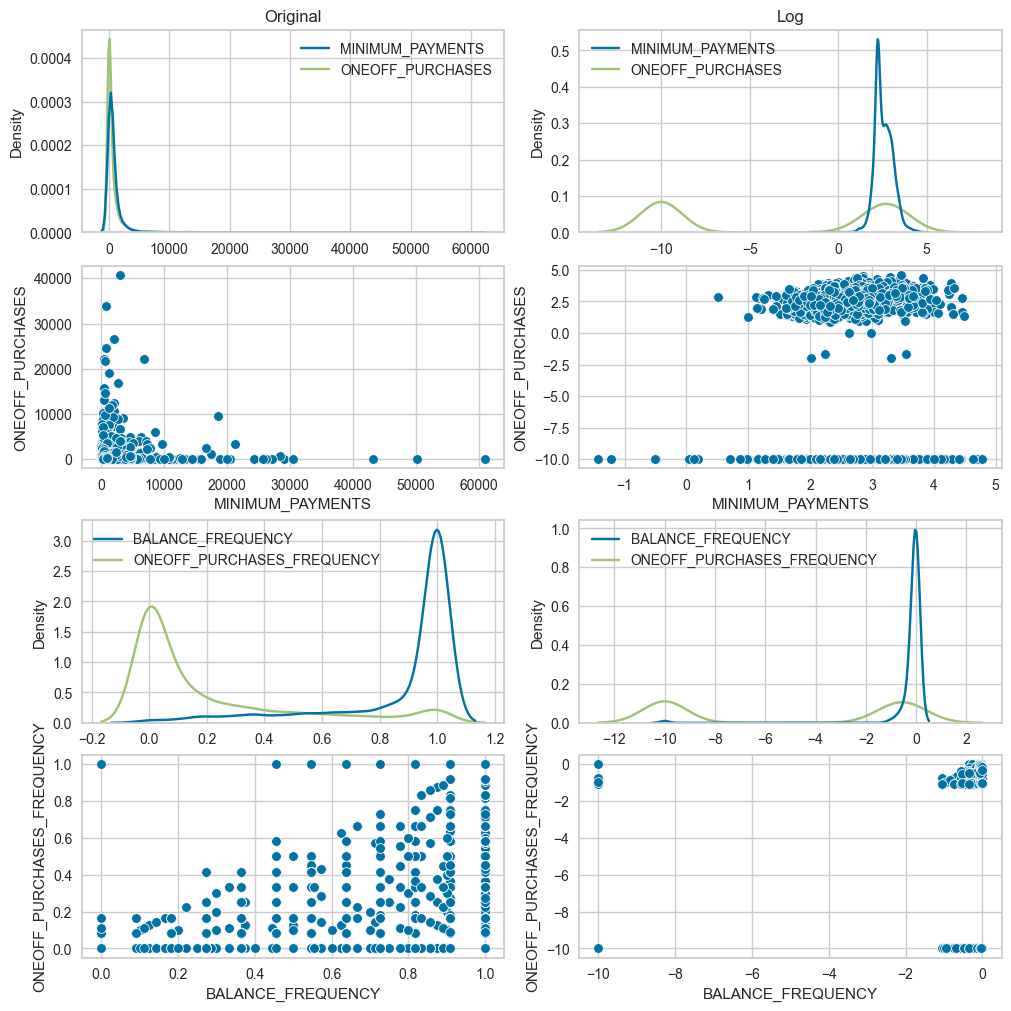

In [7]:
# Log Transformation demonstration
def isolate():
    fig, axes = plt.subplots(4,2, layout="constrained", figsize=(10,10))

    dt_log = np.log10(dt + 10**-10)

    print("MINIMUM_PAYMENTS original skew %.2f" % dt['MINIMUM_PAYMENTS'].skew())
    print("ONEOFF_PURCHASES original skew %.2f" % dt['ONEOFF_PURCHASES'].skew())

    print("MINIMUM_PAYMENTS log skew %.2f" % dt_log['MINIMUM_PAYMENTS'].skew())
    print("ONEOFF_PURCHASES log skew %.2f" % dt_log['ONEOFF_PURCHASES'].skew())

    print("BALANCE_FREQUENCY original skew %.2f" % dt['BALANCE_FREQUENCY'].skew())
    print("ONEOFF_PURCHASES_FREQUENCY original skew %.2f" % dt['ONEOFF_PURCHASES_FREQUENCY'].skew())

    print("BALANCE_FREQUENCY log skew %.2f" % dt_log['BALANCE_FREQUENCY'].skew())
    print("ONEOFF_PURCHASES_FREQUENCY log skew %.2f" % dt_log['ONEOFF_PURCHASES_FREQUENCY'].skew())
    
    axes[0][0].set_title('Original')
    axes[0][1].set_title('Log')

    # Left - Original (highly skewed to the right)
    sns.kdeplot(data=dt[['MINIMUM_PAYMENTS', 'ONEOFF_PURCHASES']], ax=axes[0][0])
    sns.scatterplot(data=dt, x='MINIMUM_PAYMENTS', y='ONEOFF_PURCHASES', ax=axes[1][0])

    # Right - Log
    sns.kdeplot(data=dt_log[['MINIMUM_PAYMENTS', 'ONEOFF_PURCHASES']], ax=axes[0][1])
    sns.scatterplot(data=dt_log, x='MINIMUM_PAYMENTS', y='ONEOFF_PURCHASES', ax=axes[1][1])

    # Left - Original (negatively skewed to the right)
    sns.kdeplot(data=dt[['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']], ax=axes[2][0])
    sns.scatterplot(data=dt, x='BALANCE_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', ax=axes[3][0])

    # Right - Log
    sns.kdeplot(data=dt_log[['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']], ax=axes[2][1])
    sns.scatterplot(data=dt_log, x='BALANCE_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', ax=axes[3][1])
isolate()

- No outliers and gaussian-like distribution

  We will still use strategy median imputation for simplicity because in a gaussian-like distribution, median is similar to mean.

<AxesSubplot: xlabel='PURCHASES_FREQUENCY'>

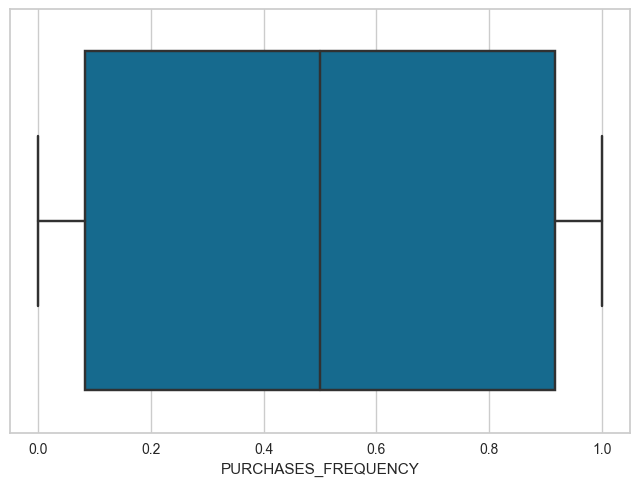

In [8]:
# Check if 'PURCHASES_FREQUENCY' have outliers.
sns.boxplot(data=dt, x='PURCHASES_FREQUENCY')

- 1/4 of the dataset have 'MINIMUM_PAYMENTS' > 'PAYMENTS'
  
  This indicates, 1/4 of the credit card company's customers have not paid in full the minimum payments.

- There are no value 0 in 'MINIMUM_PAYMENTS'. We concludes that if a customer has not pay the minimum payments. Therefore, imputation strategy with 0 is justified.
  - [x] Handle the missing values in 'MINIMUM_PAYMENTS' with `sklearn.impute.SimpleImputer(strategy='constant', fill_value=0)` (cancelled)

    The PC1, PC2, PC3 only accounts for 69.1% of the total variations if we impute the missing values for 'MINIMUM_PAYMENTS' with 0 (and without Log10 Transformation). Also, the plotted scatter points in 3D are hard to differentiate by eye.

In [9]:
# Check if MINIMUM_PAYMENTS < PAYMENTS
with pd.option_context("display.float_format", "{:,.2f}".format):
    display("MINIMUM_PAYMENTS > PAYMENTS", dt.loc[dt['MINIMUM_PAYMENTS'] > dt['PAYMENTS'],['PAYMENTS', 'MINIMUM_PAYMENTS']].count(axis=0))
    display("MINIMUM PAYMENTS < PAYMENTS", dt.loc[dt['MINIMUM_PAYMENTS'] < dt['PAYMENTS'],['PAYMENTS', 'MINIMUM_PAYMENTS']].count(axis=0))
    display("MINIMUM PAYMENTS sorted", dt[['PAYMENTS', 'MINIMUM_PAYMENTS']].sort_values(by='MINIMUM_PAYMENTS').head())

'MINIMUM_PAYMENTS > PAYMENTS'

PAYMENTS            1191
MINIMUM_PAYMENTS    1191
dtype: int64

'MINIMUM PAYMENTS < PAYMENTS'

PAYMENTS            3126
MINIMUM_PAYMENTS    3126
dtype: int64

'MINIMUM PAYMENTS sorted'

,PAYMENTS,MINIMUM_PAYMENTS
159,177.67,0.04
9,33.25,0.06
2327,887.98,0.31
574,789.26,0.32
1940,318.71,1.11


## Relationship between features

- 'CASH_ADVANCE' is not considered as 'PURCHASES'
- 'CASH_ADVANCE' decrease 'BALANCE'.

In [10]:
# Check if CASH_ADVANCE correlates with ONEOFF_PURCHASES
dt.loc[(dt['CASH_ADVANCE'] > 0), ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                  'CREDIT_LIMIT', 'PAYMENTS']]

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
2321,539.162731,0.00,0.00,0.00,1103.303820,1200.0,360.986284
2322,485.507827,0.00,0.00,0.00,455.227731,2000.0,794.426157
2323,1575.508838,0.00,0.00,0.00,1977.834772,2500.0,260.843536
2324,13.440318,0.00,0.00,0.00,138.410148,1500.0,150.900080
2325,5239.381493,0.00,0.00,0.00,9798.167329,10000.0,1345.580941
...,...,...,...,...,...,...,...
4470,1079.008102,0.00,0.00,0.00,1259.571764,1200.0,1379.635287
4471,809.582978,0.00,0.00,0.00,3819.672466,4150.0,4372.148648
4472,3386.490883,560.98,427.22,133.76,2008.153534,10100.0,1039.000037
4473,4840.545574,1595.93,1595.93,0.00,4359.325750,6000.0,905.844846


- 'PURCHASES' aggregates 'ONEOFF_PURCHASES', 'INSTALLMENT_PURCHASES'

In [11]:
# Check if CASH_ADVANCE correlates with ONEOFF_PURCHASES
dt.loc[dt['PURCHASES'] > 0, ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                             'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                             'CREDIT_LIMIT', 'PAYMENTS']]

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
0,16.581535,200.00,0.00,200.00,0.000000,1200.0,0.000000
1,943.584041,103.00,103.00,0.00,0.000000,1000.0,215.325023
2,1.979916,80.00,80.00,0.00,0.000000,1500.0,0.000000
3,461.455720,585.00,585.00,0.00,0.000000,1000.0,258.032630
4,1053.594730,1450.00,1450.00,0.00,0.000000,1500.0,397.090516
...,...,...,...,...,...,...,...
4466,7468.012010,1569.41,796.07,773.34,4500.288676,8700.0,2162.943350
4468,706.327578,169.54,169.54,0.00,1406.735573,2500.0,302.976780
4472,3386.490883,560.98,427.22,133.76,2008.153534,10100.0,1039.000037
4473,4840.545574,1595.93,1595.93,0.00,4359.325750,6000.0,905.844846


## 4.1 - visualization function

In [12]:
# 3D scatter plot
def plot_scatter3d(x, y, z, labels=None):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    cmap = ListedColormap(sns.color_palette("tab10").as_hex())

    if labels is None:
        ax.scatter(xs=x, ys=y, zs=z)
    else:
        sc = ax.scatter(xs=x, ys=y, zs=z, c=labels, cmap=cmap)
        plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [13]:
# Hierarchical clustering dendogram
def plot_dendogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
    
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [14]:
# library for silhouette coefficient visualization
def plot_silhouette(estimator, X, labels, ax):
    silhouette_avg = silhouette_score(X=X, labels=labels)

    sample_silhouette_values = silhouette_samples(X=X, labels=labels)

    n_clusters = len(np.unique(labels))

    ax.set_xlim([-1,1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 75])

    y_lower = 75
    for i in np.unique(estimator.labels_):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower,y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 75

    ax.axvline(x=silhouette_avg, color="red", linestyle='--')

# 5 - Data Preprocessing

In [15]:
# Sampling for Inference Set
inf_set = dt.sample(n=10, random_state=17)

# Drop Inference Set from Train and Test Set
X_train = dt.drop(index=inf_set.index)

# Drop 'CUST_ID' because it does not have correlation with other features.
X_train.drop(labels='CUST_ID', axis=1, inplace=True, errors='ignore')

In [16]:
# Pipeline for data preprocessing
# do not use lambda if you are going to deploy this to a server.
# joblib can't pickle lambda.
def log10(x):
    return np.log10(x + 10**-10)

num_prep = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        # + 10**-10 to avoid log10(0)
        ('log', FunctionTransformer(func=log10)),
        ('scaler', RobustScaler())
    ]
)

composer = ColumnTransformer(transformers=[
    ('num_prep', num_prep, num)
])

**Ask Instructor**

- [ ] Why is multicollinearity helps PCA?
- [ ] Why is feature with high multicollinearity is not more important in PC1, or PC2, or PC3 compared to other features?

In [17]:
# Check multicollinearity.
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = composer.named_transformers_['num_prep'][-1] \
                                  .get_feature_names_out(num)
    vif_data['VIF'] = [variance_inflation_factor(X_train_final, i)
                       for i in range(len(vif_data['Feature']))]
    display(vif_data.sort_values(by='VIF', ascending=False)
                    .style.background_gradient(cmap='coolwarm'))

isolate()

,Feature,VIF
10,CASH_ADVANCE_TRX,2826.408009
9,CASH_ADVANCE_FREQUENCY,2553.973189
8,PURCHASES_INSTALLMENTS_FREQUENCY,1744.760051
4,INSTALLMENTS_PURCHASES,1708.213682
6,PURCHASES_FREQUENCY,1338.769034
3,ONEOFF_PURCHASES,1256.185148
7,ONEOFF_PURCHASES_FREQUENCY,1254.297749
2,PURCHASES,1222.875889
5,CASH_ADVANCE,768.556690
11,PURCHASES_TRX,306.672216


In [18]:
# Get Loading Score per PC.
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    pca = PCA(random_state=17)
    pca.fit(X=X_train_final)

    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    loadings = pd.DataFrame(data=pca.components_.T, 
                            columns=labels, 
                            index=composer.named_transformers_['num_prep'][-1]
                                          .get_feature_names_out(num))
    display(loadings.style.background_gradient(cmap='coolwarm'))

isolate()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
BALANCE,-0.065214,0.022288,-0.023546,-0.519432,-0.056907,-0.107919,0.078660,0.114453,0.142462,-0.776197,-0.202447,0.162649,-0.021079,-0.007057,-0.001712,-0.000476,-0.000165
BALANCE_FREQUENCY,-0.996131,-0.006852,0.059943,0.038032,0.001694,0.005591,-0.004729,-0.005006,-0.010035,0.046984,0.012246,-0.009784,0.001202,0.000458,0.000044,0.000027,0.000014
PURCHASES,0.003125,-0.562870,0.012798,-0.069731,0.122350,-0.013462,0.005444,-0.037674,-0.033120,-0.246350,0.630130,-0.445312,0.012169,-0.002189,0.016064,-0.004494,0.062922
ONEOFF_PURCHASES,-0.002467,-0.042537,-0.004469,-0.151949,0.484701,-0.102147,0.017846,-0.057381,0.433429,0.157394,0.036779,0.066807,0.006719,0.052405,-0.542251,0.028935,-0.458238
INSTALLMENTS_PURCHASES,0.000571,-0.048406,-0.006226,0.059515,-0.421431,-0.024277,-0.220533,0.131325,0.492840,0.043053,0.119733,-0.027167,-0.000866,-0.023597,0.453211,0.069108,-0.528629
CASH_ADVANCE,-0.002891,0.042879,-0.010581,-0.247387,0.039905,0.444513,-0.245276,0.010357,-0.036304,0.055146,0.021648,-0.018887,0.012862,0.815632,0.063642,-0.051506,0.008933
PURCHASES_FREQUENCY,0.005029,-0.588954,0.022232,0.019459,-0.085188,0.104183,0.026006,0.019558,-0.156048,0.081828,0.069672,0.769497,-0.040350,-0.002071,-0.009900,0.004270,-0.057353
ONEOFF_PURCHASES_FREQUENCY,-0.002479,-0.042408,-0.003966,-0.149689,0.483373,-0.098002,0.019714,-0.057696,0.430591,0.183782,-0.013360,0.147842,-0.006602,-0.044538,0.534567,-0.027756,0.446119
PURCHASES_INSTALLMENTS_FREQUENCY,0.000707,-0.047988,-0.005661,0.062811,-0.422287,-0.016734,-0.213810,0.134648,0.480520,0.061703,0.089795,0.039212,0.005786,0.026124,-0.455630,-0.069971,0.541988
CASH_ADVANCE_FREQUENCY,-0.002949,0.043441,-0.010538,-0.247714,0.043024,0.458822,-0.237319,0.014807,-0.028059,0.066404,0.022348,-0.027725,0.004284,-0.449144,-0.011147,-0.673476,-0.076257


- PC1, PC2 accounts for 99.1% of the total variations.

PC1, PC2, PC3 acccounts for 99.1% of the total variations


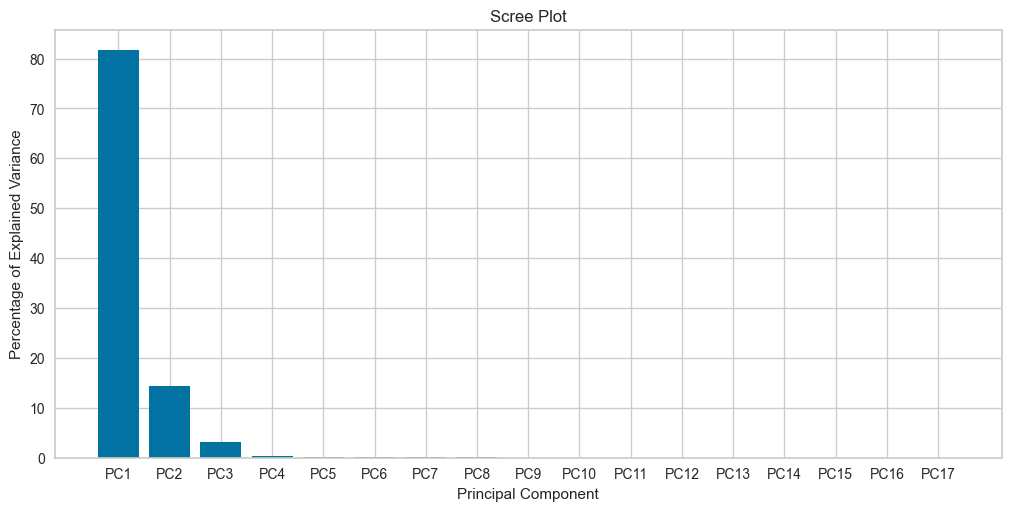

In [19]:
# Scree Plot
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    pca = PCA(random_state=17)
    pca.fit(X=X_train_final)

    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    print("PC1, PC2, PC3 acccounts for %s%% of the total variations" % (np.sum(per_var[:3])))

    fig, ax = plt.subplots(1,1, layout="constrained", figsize=(10,5))

    ax.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    ax.set_ylabel('Percentage of Explained Variance')
    ax.set_xlabel('Principal Component')
    ax.set_title('Scree Plot')

isolate()

## 5.1 - PC Visualization

- PC1 and PC2 only have 3 visible clusters. Meanwhile, we clearly should have more than 3 clusters based on features:
  - 'ONEOFF_PURCHASES_FREQUENCY': Customers that frequently use credit card to purchase products or services in one-go.
  - 'PURCHASES_INSTALLMENTS_FREQUENCY': Customers that frequently use credit card for payment plan.
  - 'CASH_ADVANCE_FREQUENCY': Customers that frequently use credit card for cash in advance.
  - many more.

  Duly noted: 'PURCHASES' aggregates 'ONEOFF_PURCHASES' and 'PURCHASES_INSTALLMENTS'.

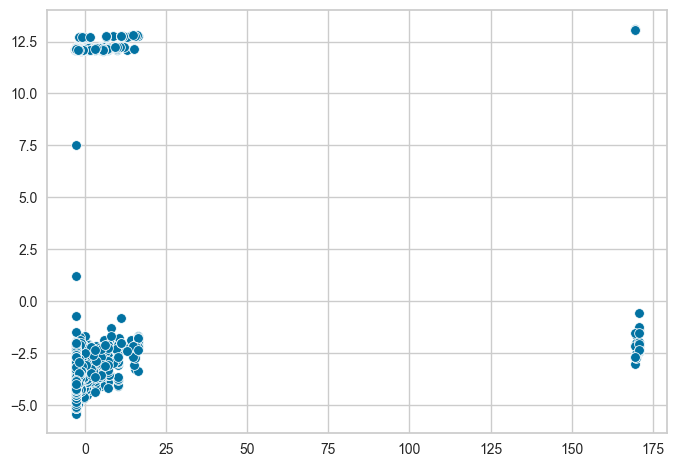

In [20]:
# PC1, PC2 visualization
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    pca_data = PCA().fit_transform(X=X_train_final)
    x, y = pca_data[:,:2].T

    sns.scatterplot(x=x, y=y)

isolate()

- We identified 1 cluster with 4 points.
- We identified 6 clusters with more than 4 points.

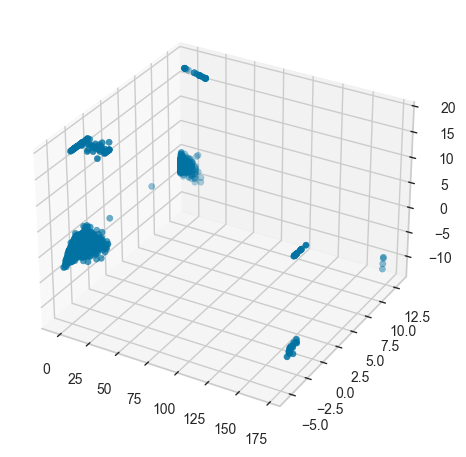

In [21]:
# PC1, PC2, PC3 visualization
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    pca_data = PCA().fit_transform(X=X_train_final)
    x, y, z = pca_data[:,:3].T

    plot_scatter3d(x=x, y=y, z=z)

    # fig = px.scatter_3d(x=x, y=y, z=z)
    # fig.update_traces(marker_size = 2)
    # fig.show()

isolate()

In [22]:
# Define the preprocessor
preprocessor = Pipeline(steps=[
    ('composer', composer),
    ('pca', PCA(n_components=3))
])

# 6 - Model Definition

KMeans is used because the clusters can be separated by our own eye. Therefore, the n_clusters should be either 6 or 7.
DBSCAN is used because we see an outlier and we want to detect it.

In [23]:
# KMeans Model Definition
kmeans_list = [KMeans(n_clusters=i, random_state=17) for i in range(2,10)]

- The elbow is somewhere between 0.8 and 1.2.
  
  However, after visualizing the Scatter Plot, epsilon 0.8 or 1.2 give disappointing results.

  Therefore, we will arbitarily choose epsilon based on silhouette score instead of the elbow method.

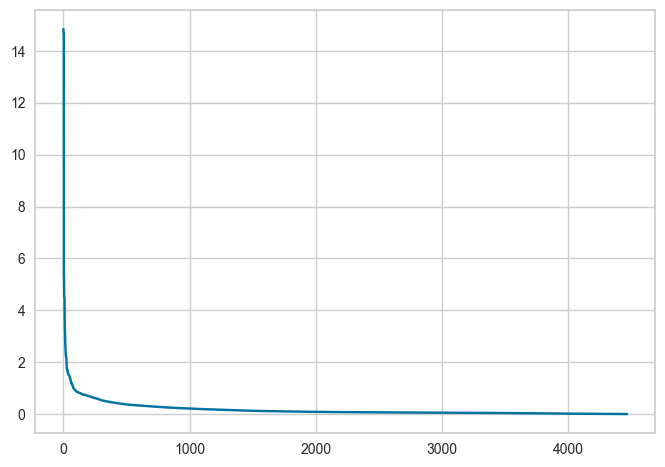

In [24]:
# predicting epsilon for DBSCAN
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    neigh = NearestNeighbors(n_neighbors=6)
    neigh.fit(X=X_train_final)

    distances, _ = neigh.kneighbors(X=X_train_final)

    distances = np.sort(distances, axis=0)

    farthest_distances = distances[:,-1]
    farthest_distances[::-1].sort() # hack.

    sns.lineplot(x=range(0, len(farthest_distances)), y=farthest_distances)

    # fig = px.line(y=farthest_distances)
    # fig.show()

isolate()

In [25]:
# DBSCAN Model Definition
def isolate():
    global dbscan_list
    eps_list = np.arange(4.4, 4.5, 0.01)
    dbscan_list = [DBSCAN(eps=i) for i in eps_list]

isolate()

> [dendrograms often suggest a correct number of clusters when there is no real evidence to support the conclusion.](https://www.displayr.com/what-is-dendrogram/)

- Height of the join indicates dissimilarity. We expected that there should be 7 clusters. Therefore, we will test `distance_threshold` between 9 and 18 with linkage='average' or centroid.

In [26]:
# Hierarchical clustering dendogram
def plot_dendogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
    
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

The number of clusters found by the algorithm 7


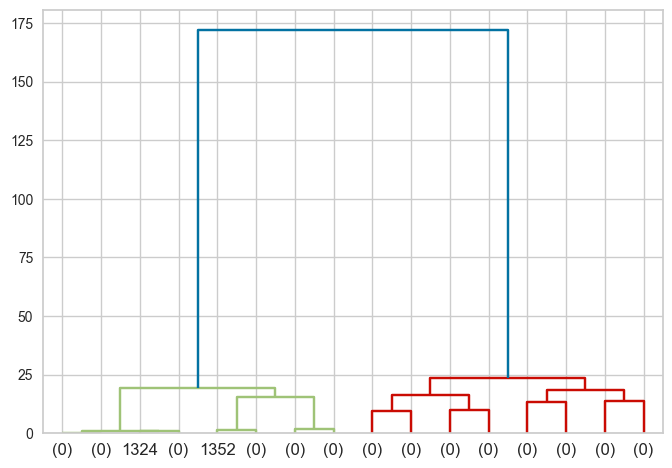

In [27]:
# Preview dendogram and visualize the 3D scatter based on distance threshold
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)
    hier = AgglomerativeClustering(distance_threshold=14, n_clusters=None, linkage="average")
    hier.fit(X=X_train_final)

    print("The number of clusters found by the algorithm", hier.n_clusters_)

    x, y, z = X_train_final.T

    # fig = px.scatter_3d(x=x, y=y, z=z, color=hier.labels_)
    # fig.update_traces(marker_size=2)
    # fig.show()

    plot_dendogram(hier, truncate_mode="level", p=3)

isolate()

In [28]:
# Hierarchical Clustering
hier_list = [AgglomerativeClustering(distance_threshold=i, n_clusters=None, linkage="average") for i in np.arange(9,18.1,0.5)]

# 7 - Model Training

In [29]:
# Training KMeans
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    for kmeans in kmeans_list:
        kmeans.fit(X_train_final)

isolate()

In [30]:
# Training DBSCAN
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    for dbscan in dbscan_list:
        dbscan.fit(X=X_train_final)

isolate()

In [31]:
# Training Hierarchical Clustering
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    for hier in hier_list:
        hier.fit(X=X_train_final)

isolate()

# 8 - Model Evaluation

## 8.1 - KMeans

- The Elbow Method shows that the significant reduction in variation is with `n_clusters=3`.
- However, the silhouette score shows that `n_cluster=2` have the highest coefficient mean. This indicates that KMeans is not the right algorithm for this data set. This is because we can see there should be more than 3 clusters in [PC Visualization](#51---pc-visualization).

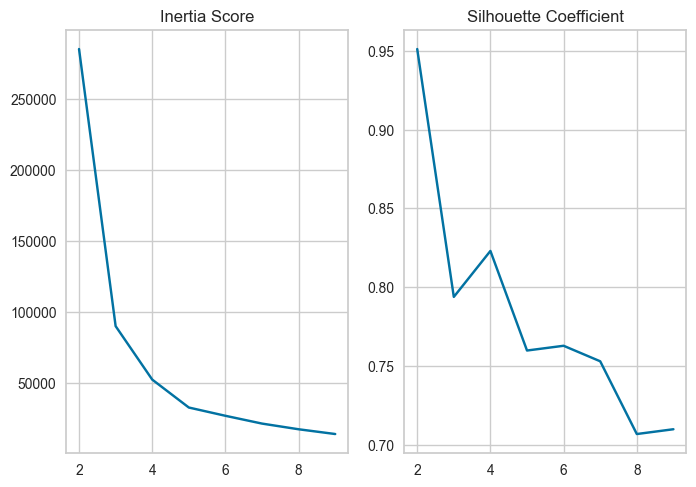

In [32]:
# Get Reduction in Variation and Silhouette Score
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    n_clusters = []
    inertia = []
    silh = []

    for kmeans in kmeans_list:
        n_clusters.append(kmeans.n_clusters)
        inertia.append(kmeans.inertia_)
        silh.append(silhouette_score(X_train_final, kmeans.labels_))

    _, axes = plt.subplots(nrows=1, ncols=2)

    axes[0].plot(n_clusters, inertia)
    axes[0].set_title('Inertia Score')

    axes[1].plot(n_clusters, silh)
    axes[1].set_title('Silhouette Coefficient')

isolate()

**Ask Instructor**
- [ ] What is the impact of using `KMeans(n_clusters=4)`, suppose that it is less cohesive?

  > clusters that are less cohesive will fall short of the average score across all clusters?

- [ ] What is the impact of using `KMeans(n_clusters=3)`, suppose that it have cluster imbalance?

  > clusters that have wider silhouettes indicates that there are cluster imbalance.

  My assumption is that cluster imbalance is natural. i.e. people that uses credit card for payment plan (average joe) or people that uses credit card for cash in advance (business person).

- According to `yellowbrick.cluster.SilhouetteVisualizer`, silhouette coefficient per point tells us that:
  - cofficient lower than 0 indicates that the point have been assigned to the wrong cluster. (clusters 7 and so on)
  - clusters that are less cohesive will fall short of the average score across all clusters. (clusters 4 and so on)
  - clusters that have wider silhouettes indicates that there are cluster imbalance. (clusters 3 and so on)

TODO
- [ ] Interpret `KMeans(n_clusters=2)`

  Although clusters 2 have cluster imbalance. We concludes that it is the best clusters with KMeans based on the silhouette coefficient average.

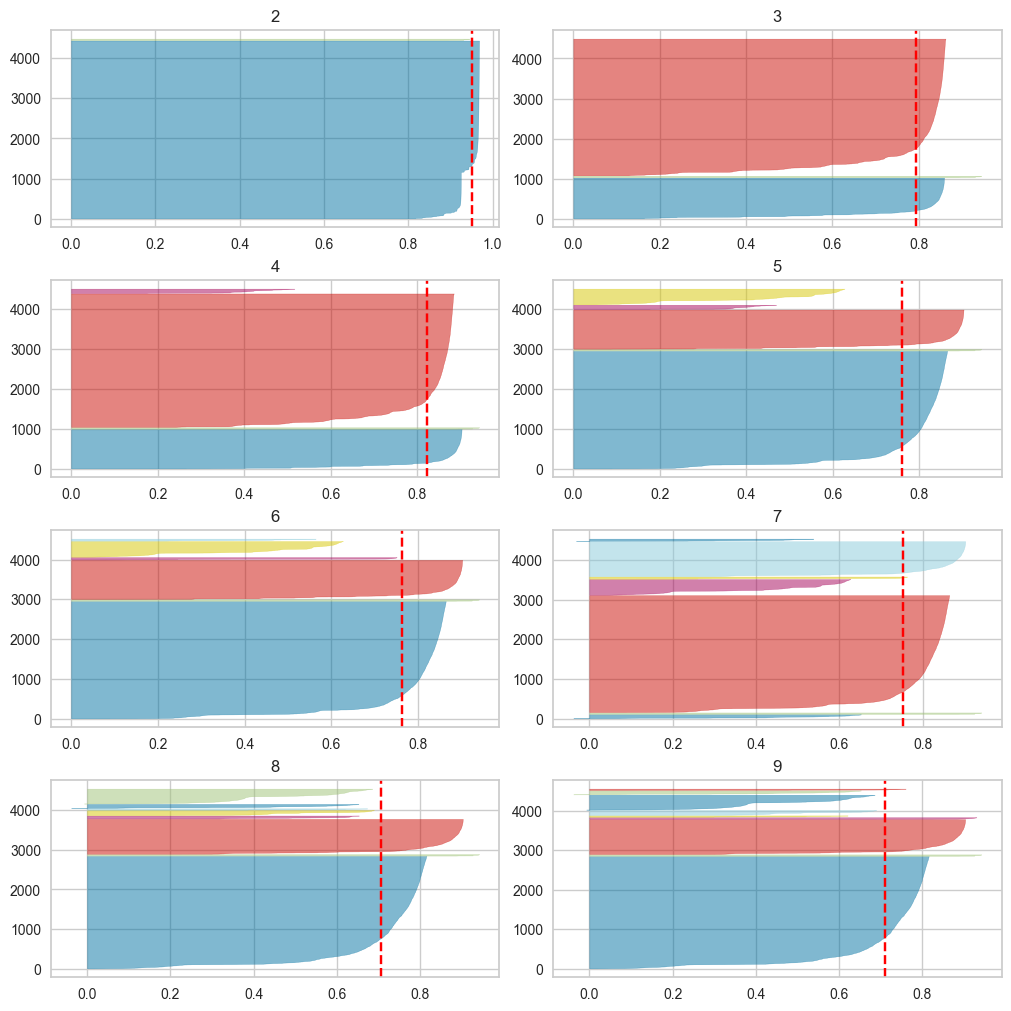

In [33]:
# Get silhouette cofficient per point.
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    fig, axes = plt.subplots(4,2, layout="constrained", figsize=(10,10))

    for kmeans, ax in zip(kmeans_list, axes.ravel()):
        ax.set_title(kmeans.n_clusters)
        visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=ax)
        visualizer.fit(X=X_train_final)
    
isolate()

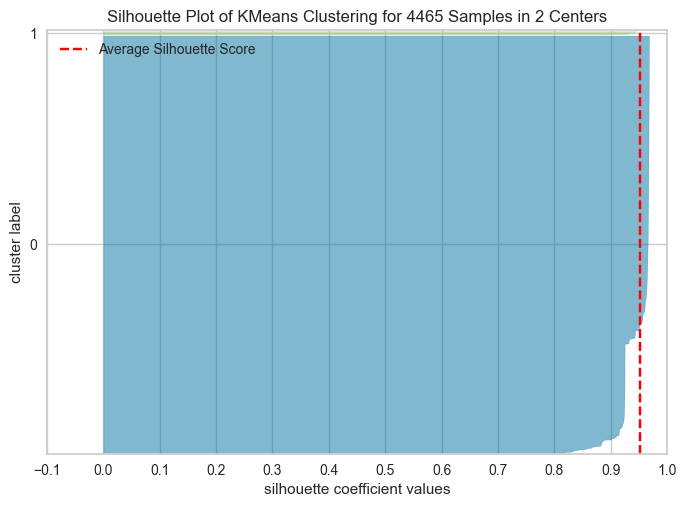

In [34]:
# n_clusters=3 closer look
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    kmeans = kmeans_list[2-2]
    visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
    visualizer.fit(X=X_train_final)
    visualizer.show()

isolate()

- Changing to `n_clusters=2`, KMeans assigns points that are visibly far apart into 1 cluster.
- Increasing `n_clusters=2` to 4 or more, KMeans assign points that are visibly connected as separate cluster.
- `n_clusters=3` assign an outlier to cluster 0, 1 and 2.

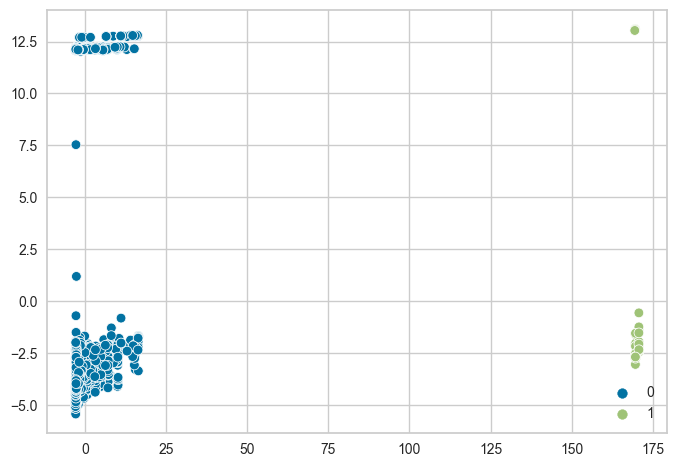

In [35]:
# PC1, PC2, PC3 visualization
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)
    kmeans = kmeans_list[2-2]

    x, y = X_train_final[:,:2].T

    sns.scatterplot(x=x, y=y, hue=kmeans.labels_)

isolate()

- `n_clusters=3` KMeans assigns points that are visibily far apart into 1 cluster.

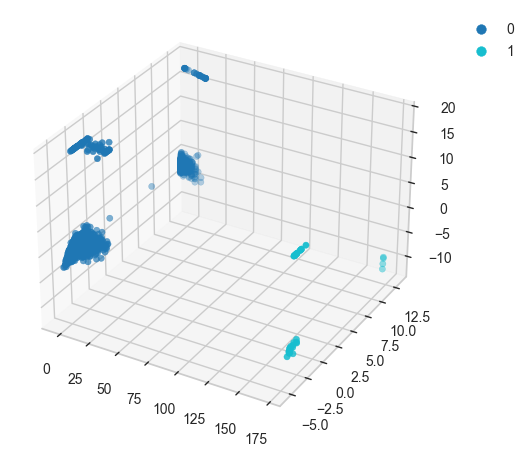

In [36]:
# PC1, PC2, PC3 visualization
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)
    kmeans = kmeans_list[2-2]

    x, y, z = X_train_final.T

    plot_scatter3d(x=x, y=y, z=z, labels=kmeans.labels_)

    # fig = px.scatter_3d(x=x, y=y, z=z, color=kmeans.labels_)
    # fig.update_traces(marker_size=3)
    # fig.show()

isolate()

**Ask Instructor**

- [ ] If we can't conclude Cluster 3 and the silhouette coefficient per point does not satify the 3 requirements, does it mean that KMeans is not the solution?

- Cluster 0 occassionally uses the installments service.

  Although Cluster 0 seldom uses the cash advance service. This Cluster 0 'CASH_ADVANCE' mean is the highest among the cluster.

  However, the Cluster 0 'BALANCE' mean is the highest among the cluster. Therefore, the credit card company can target Cluster 0 with advertising to be more consumptive.

- Cluster 1 sometimes uses the installments service.

  Cluster 1 'BALANCE' mean is the lowest among the cluster. Therefore, the credit card company can offer Cluster 1 with higher balance to make more purchases.

  Duly noted: The bulk of customers are in Cluster 0. Therefore, the credit card company should focus more budget for Cluster 0 than 1.

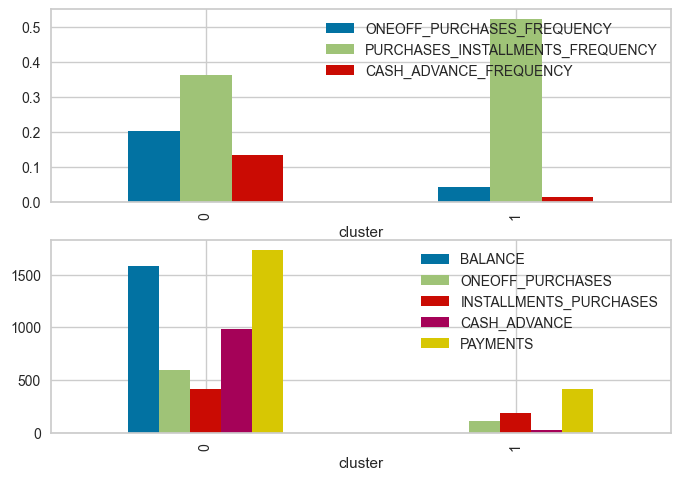

In [37]:
# Interpreting clusters based on KMeans(n_clusters=3)
def isolate():
    kmeans = kmeans_list[2-2]

    X_train_imputed = num_prep[0].fit_transform(X=X_train)

    Xy_train_imputed = pd.concat([
        pd.DataFrame(
            data=X_train_imputed, 
            columns=num_prep[0].get_feature_names_out()
        ),
        pd.DataFrame({'cluster': kmeans.labels_})
    ], axis=1)

    _, axes = plt.subplots(2,1)

    interests_1 = [
        'ONEOFF_PURCHASES_FREQUENCY', 
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'cluster'
    ]

    Xy_train_imputed[interests_1].groupby(by='cluster').mean().plot.bar(ax=axes[0])

    interests_2 = [
        'BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
        'CASH_ADVANCE', 'PAYMENTS', 'cluster'
    ]
    
    Xy_train_imputed[interests_2].groupby(by='cluster').mean().plot.bar(ax=axes[1])

isolate()

## 8.2 - DBSCAN

best estimator index 7 DBSCAN(eps=4.469999999999999) 0.8253399596148975


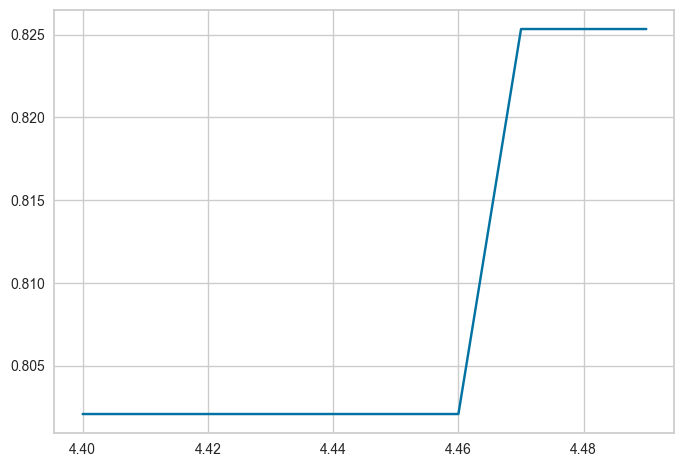

In [38]:
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    eps_list = []
    silh = []

    for dbscan in dbscan_list:
        eps_list.append(dbscan.eps)
        silh.append(silhouette_score(X=X_train_final, labels=dbscan.labels_))

    print("best estimator index", np.argmax(silh), dbscan_list[np.argmax(silh)], max(silh))
    
    sns.lineplot(x=eps_list, y=silh)

isolate()

- DBSCAN identified 7 clusters. However, we look closely, label 5 and label 6 is very close together.

In [39]:
def plot_scatter3d(x, y, z, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    cmap = ListedColormap(sns.color_palette("tab10").as_hex())

    sc = ax.scatter(xs=x, ys=y, zs=z, c=labels, cmap=cmap)

    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


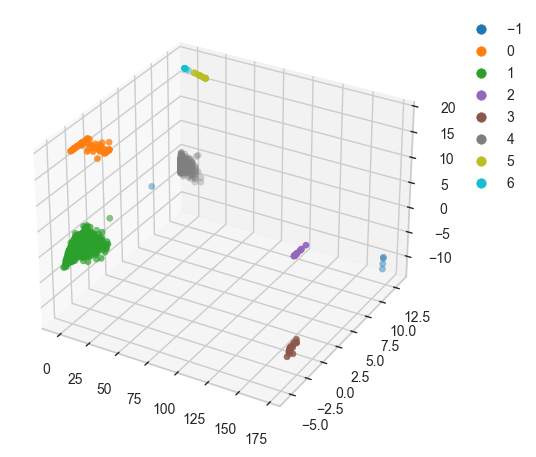

In [40]:
# 3D scatter without plotly
# reference: https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    dbscan = dbscan_list[7]

    x, y, z = X_train_final.T

    plot_scatter3d(x=x, y=y, z=z, labels=dbscan.labels_)

    # fig = px.scatter_3d(x=x, y=y, z=z, color=kmeans.labels_)
    # fig.update_traces(marker_size=3)
    # fig.show()

isolate()

- There are cluster imbalance. This assumption is because the clusters 0, 2, 3, 5, 6 have very thin silhouette. However, we believe this is natural as there should be more workers (who we assume uses installments service frequently) than business person (who we assume the cash advance service frequently and nothing else)
- Clusters 0, 5 silhouette coefficient is lower than the average silhouette coefficient. This indicates that the clusters are less cohesive (the point is very close the nearest cluster, the other point is very far from the nearest cluster).
- However, if we compare it with different epsilon parameter. This parameter do not have minus silhouette coefficient in any cluster. Therefore, we concludes that there should be no point that is assigned to the wrong cluster.

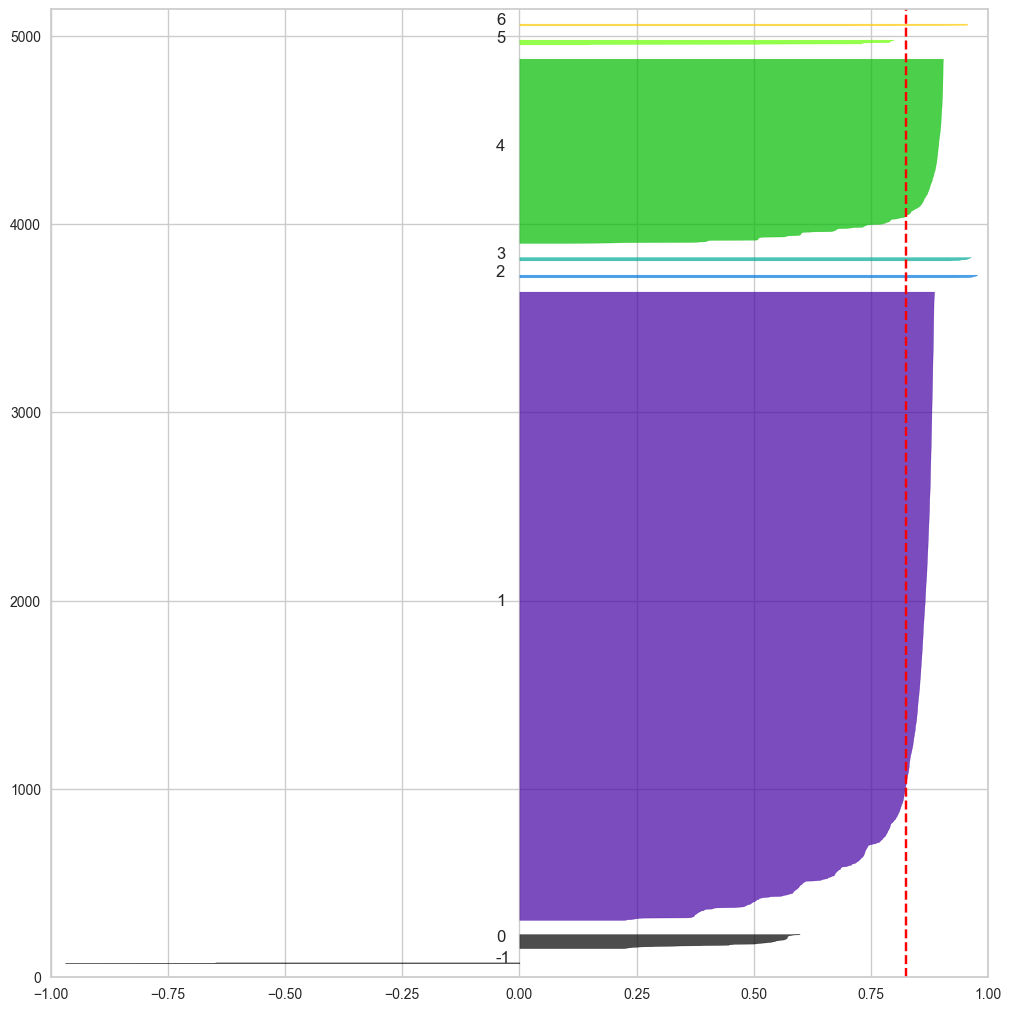

In [41]:
# plot the silhouette coefficient
# reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    dbscan = dbscan_list[7]

    fig, ax = plt.subplots(1,1, layout="constrained", figsize=(10,10))

    plot_silhouette(estimator=dbscan, X=X_train_final, labels=dbscan.labels_, ax=ax)

isolate()

- Cluster -1 seldom uses the cash advance service.

  Duly noted: Cluster 0 'PAYMENTS' mean is 3rd highest (1600 USD)

- Cluster 0 'PAYMENTS' mean is very low (limit the 'BALANCE')

- Cluster 1 ocasionally uses the installments service.

  Duly noted: Cluster 0 'PAYMENTS' mean is 1st highest (1700 USD). Also, the bulk of customers are in Cluster 1.

  The 'BALANCE' mean is 1400 USD. Therefore, the credit card company can target Cluster 1 with advertising to be more consumptive.

- Cluster 2 'PAYMENTS' mean is very low (limit the 'BALANCE')

- Cluster 3 is sometimes uses the installments service.

- Cluster 4 seldom uses the cash advance service.

  The 'BALANCE' mean is very high (2000 USD). Therefore, the credit card company can target Cluster 4 with advertising to be more consumptive. However, we assume that Cluster 4 is a corporate credit card company used by business person. As this Cluster 4 never made any purchases.

  Duly noted: the bulk of custoemrs are in Cluster 4 (2nd largest)

- Cluster 5 'PAYMENTS' mean is very low (limit the 'BALANCE')

- Cluster 6 'PAYMENTS' mean is very low (limit the 'BALANCE')

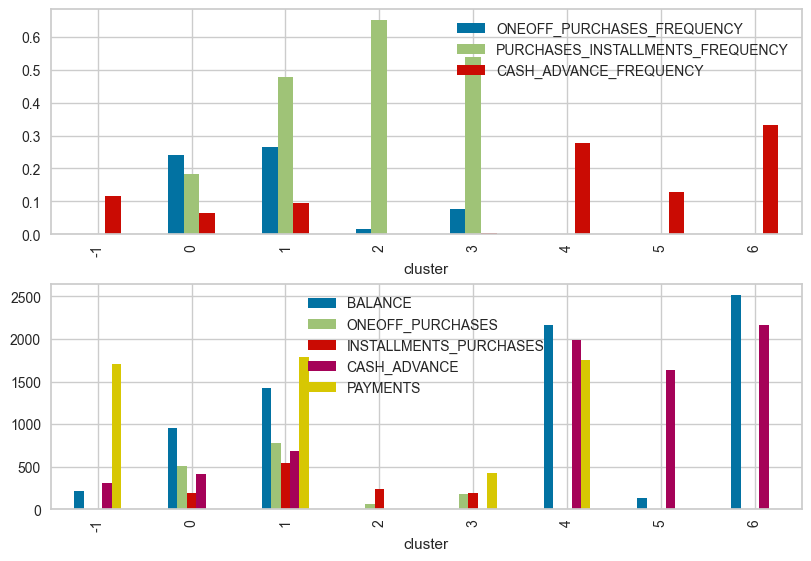

In [42]:
# Interpreting clusters based on DBSCAN(eps=4.469, min_samples=6)
def isolate():
    dbscan = dbscan_list[7]

    X_train_imputed = num_prep[0].fit_transform(X=X_train)

    Xy_train_imputed = pd.concat([
        pd.DataFrame(
            data=X_train_imputed, 
            columns=num_prep[0].get_feature_names_out()
        ),
        pd.DataFrame({'cluster': dbscan.labels_})
    ], axis=1)

    _, axes = plt.subplots(2,1, layout='constrained')

    interests_1 = [
        'ONEOFF_PURCHASES_FREQUENCY', 
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'cluster'
    ]

    Xy_train_imputed[interests_1].groupby(by='cluster').mean().plot.bar(ax=axes[0])

    interests_2 = [
        'BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
        'CASH_ADVANCE', 'PAYMENTS', 'cluster'
    ]
    
    Xy_train_imputed[interests_2].groupby(by='cluster').mean().plot.bar(ax=axes[1])

isolate()

## 8.3 - Hierarchical Clustering

- Although visually distance_threshold 14 is the best. However, the silhouette coefficient is lower. Therefore, we assume that there is something that we did not see by me.

best estimator index 2 AgglomerativeClustering(distance_threshold=10.0, linkage='average',
                        n_clusters=None) 0.8308708065708735


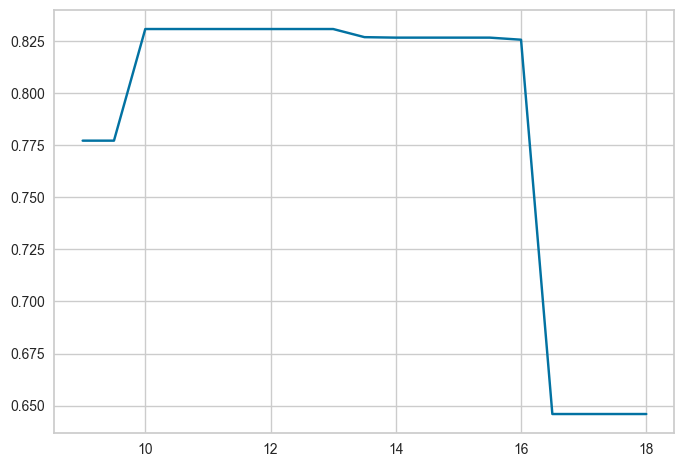

In [43]:
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    distance_threshold = []
    silh = []

    for hier in hier_list:
        distance_threshold.append(hier.distance_threshold)
        silh.append(silhouette_score(X=X_train_final, labels=hier.labels_))

    print("best estimator index", 
          np.argmax(silh), hier_list[np.argmax(silh)], max(silh))
    
    sns.lineplot(x=distance_threshold, y=silh)

isolate()

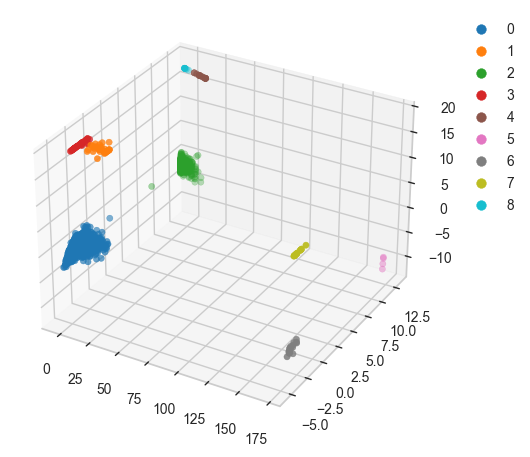

In [44]:
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)
    hier = hier_list[2]

    x, y, z = X_train_final.T

    # fig = px.scatter_3d(x=x, y=y, z=z, color=hier.labels_)
    # fig.update_traces(marker_size=3)
    # fig.show()

    plot_scatter3d(x=x,  y=y, z=z, labels=hier.labels_)

isolate()

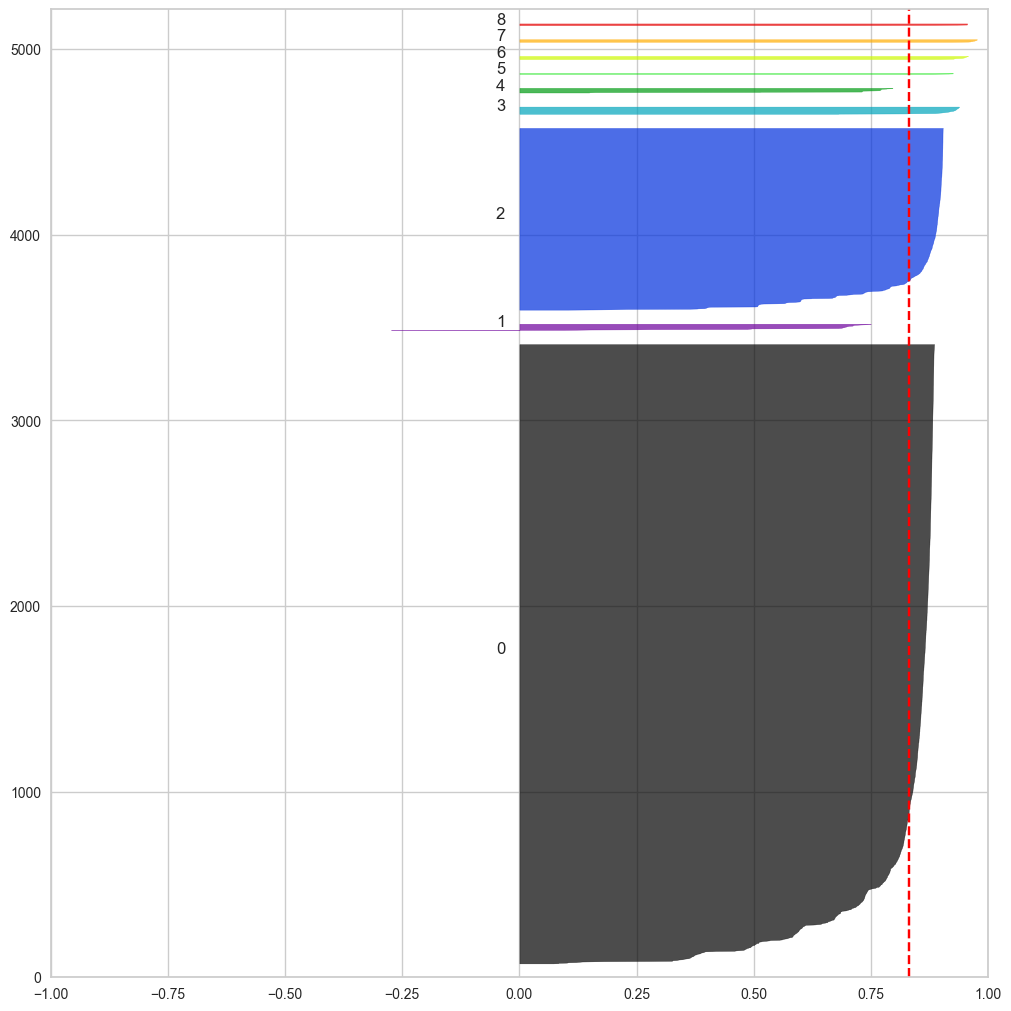

In [45]:
# plot the silhouette coefficient
# reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def isolate():
    X_train_final = preprocessor.fit_transform(X=X_train)

    hier = hier_list[2]

    fig, ax = plt.subplots(1,1, layout="constrained", figsize=(10,10))

    plot_silhouette(estimator=hier, X=X_train_final, labels=hier.labels_, ax=ax)

isolate()

- Cluster 0 occasionally uses the installments service.

  The 'BALANCE' mean is 1400 USD.

  Duly noted: the bulk of the credit card company's customers are in Cluster 0

  Therefore, the company should target Cluster 0 with advertising to be more consumptive.
  
- Cluster 1 rarely uses the credit card just to pay it later in full.

  Duly noted: the 'PAYMENTS' mean is very low. Therefore, the company should limit Cluster 0 'BALANCE'.

- Cluster 2 seldom uses the cash advance service.

  The 'BALANCE' mean is very high (2200 USD)

  Duly noted: the bulk of the credit card company's customers are in Cluster 2.

  Therefore, the company should target Cluster 2 with advertising to be more consumptive.

- Cluster 3 'PAYMENTS' mean is very low. (limit the 'BALANCE')

- Cluster 4 'PAYMENTS' mean is very low (limit the 'BALANCE')

- Cluster 5 seldom uses the installments service.

  The 'BALANCE' is very low while the 'PAYMENTS' mean is very high (1700 USD). Therefore, the company should offer Cluster 5 with higher 'BALANCE'.

- Cluster 6 'PAYMENTS' mean is very low (limit the 'BALANCE')

- Cluster 7 'PAYMENTS' mean is very low (limit the 'BALANCE')

- Cluster 8 'PAYMENTS' mean is very low (limit the 'BALANCE')

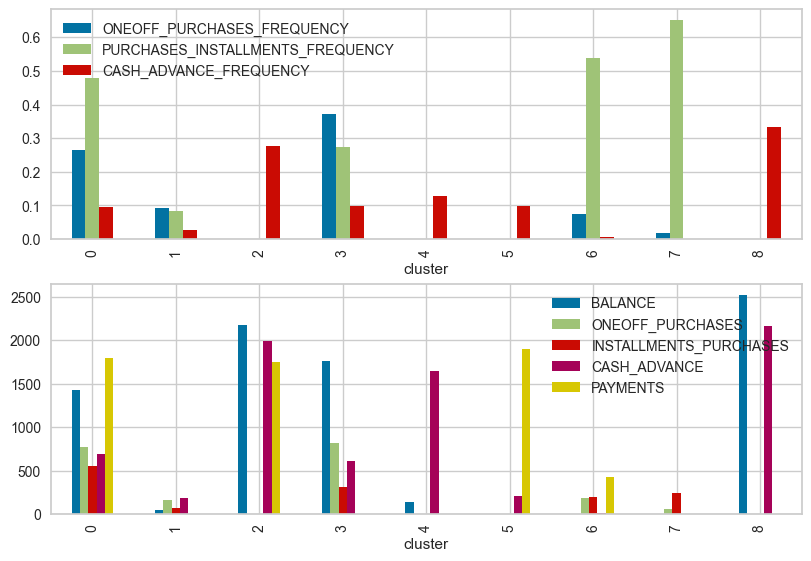

In [46]:
# Interpreting clusters based on DBSCAN(eps=4.469, min_samples=6)
def isolate():
    hier = hier_list[2]

    X_train_imputed = num_prep[0].fit_transform(X=X_train)

    Xy_train_imputed = pd.concat([
        pd.DataFrame(
            data=X_train_imputed, 
            columns=num_prep[0].get_feature_names_out()
        ),
        pd.DataFrame({'cluster': hier.labels_})
    ], axis=1)

    _, axes = plt.subplots(2,1, layout='constrained')

    interests_1 = [
        'ONEOFF_PURCHASES_FREQUENCY', 
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'cluster'
    ]

    Xy_train_imputed[interests_1].groupby(by='cluster').mean().plot.bar(ax=axes[0])

    interests_2 = [
        'BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
        'CASH_ADVANCE', 'PAYMENTS', 'cluster'
    ]
    
    Xy_train_imputed[interests_2].groupby(by='cluster').mean().plot.bar(ax=axes[1])

isolate()

# 9 - Model Inference

## 9.1 - KMeans

In [48]:
# Model Saving
def isolate():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clustering', kmeans_list[2-2])
    ])

    with open('./model/kmeans/pipe.pkl', 'wb') as file_1:
        joblib.dump(pipe, file_1)

isolate()

In [50]:
# Load Model
def isolate():
    with open('./model/kmeans/pipe.pkl', 'rb') as file_1:
        pipe = joblib.load(file_1)

    print(pipe.predict(inf_set))

isolate()

[0 0 0 0 0 0 0 0 0 0]


## 10 - Pengambilan Kesimpulan

Only KMeans have method `predict`. The other clustering algorithm only have method `fit_predict`. Therefore, it would be hard for a Data Scientist to create a classifier solely using the clustering algorithm alone.

Unfortunately, according to the silhouette coefficient average for KMeans, the best parameter is `n_clusters=2`. The consequence is that if we compare it to the result of DBSCAN and Hierarchical Clustering, KMeans failed to find cluster with very low 'PAYMENTS'. This is very important because if KMeans able to identify cluster with very low 'PAYMENTS' we can suggest the management to limit the 'BALANCE' for those clusters.

**Fortunately**, we can train a classifier based on the clustering results. This is what we are going to do if we find that KMeans failed to differentiate obvious pattern just like in this dataset.

Duly noted: KMeans have linkage parameter. Single lingkage can mimic what DBSCAN, Spectral Clustering can achieve. Therefore, it may be worthwhile just to focus with KMeans. We chose KMeans(n_clusters=2) based on Silhouette Score knowning that the algorithm failed to detect far away points as different cluster due to time constraints and other deadline.

However, we learnt one fundamental thing. Silhouette Score formula is `b - a / max(a,b)`. Therefore, silhouette does not care whether a cluster is very big as long as the next nearest cluster is very far away, it will still have high silhouette coefficient. We will improve KMeans later by tuning the `linkage` paramter.

Regarding DBSCAN, the way it works is that it calculates the euclidian distance of every points to every points. Therefore, if we have 4 points, we will have 6 calculations. Then, DBSCAN will check if within the epsilon, there are enough points near the point, so that point can be assigned as core point. Then, DBSCAN will check which non core point reach any unassigned points, so it will assign it to the same cluster. In conclusion, this algorithm does alot of things. In other words, if there are lots of points, it will take long time to train.

DBSCAN strength is that we can use this algorithm if we don't know how many clusters are there. We can also find outliers with DBSCAN. While the weakness is that it takes longer time to train.

Regarding Hierarchical Clustering, the strength is that we can use this algorithm both ways, either tuning it with `distance_threshold` or `n_clusters` parameters. We can also plot the dendogram to see the similarity. While the weakness is it takes longer time to train (i.e. `sklearn.cluster.AgglomerativeClustering` have parameter linkage just like KMeans, we assume that `linkage='average'` is re-calculated everytime a point is added to a cluster)

Duly noted: Hierarchical Clustering should be faster than DBSCAN in terms of training time.